In [11]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/label_flip_revised


In [13]:
# NOTE: `cardiotocography` is removed!

datanames = [
    'abalone_subset_std',
    'australian_std',
    'banknote_std',
    'breastcancer_std',
    'cmc_std',
    'htru2_subset_std',
    'phoneme_subset_std',
    'ringnorm_subset_std',
    'texture_subset_std',
    'yeast_subset_std'
]

print(len(datanames))

10


In [14]:
path_scores = np.sort(glob(os.path.join(PATH_ROOT, 'results', 'real', '*.csv')))
print(path_scores[:5])

['/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_nn_flfa_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_nn_random_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_svm_alfa_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_svm_random_score.csv'
 '/home/lukec/workspace/label_flip_revised/results/real/australian_std_nn_flfa_score.csv']


In [15]:
path_abalone_scores = [ps for ps in path_scores if datanames[0] in ps]
path_abalone_scores

['/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_nn_flfa_score.csv',
 '/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_nn_random_score.csv',
 '/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_svm_alfa_score.csv',
 '/home/lukec/workspace/label_flip_revised/results/real/abalone_subset_std_svm_random_score.csv']

In [16]:
df_nn_flfa = pd.read_csv(path_abalone_scores[0])
df_nn_random = pd.read_csv(path_abalone_scores[1])
df_svm_alfa = pd.read_csv(path_abalone_scores[2])
df_svm_random = pd.read_csv(path_abalone_scores[3])

df_nn_flfa = df_nn_flfa * 100
df_nn_random = df_nn_random * 100
df_svm_alfa = df_svm_alfa * 100
df_svm_random = df_svm_random * 100
df_nn_flfa.head()

,rate,train,test
0,0.0,75.0625,74.00
1,5.0,70.5000,73.50
2,10.0,72.1875,60.00
3,15.0,71.5625,55.25
4,20.0,77.4375,55.00


In [17]:
colors = {
    'svm-alfa': '#ffa000',
    'svm-random': '#388e3c',
    'nn-flfa': '#d32f2f',
    'nn-random': '#1976d2',
}

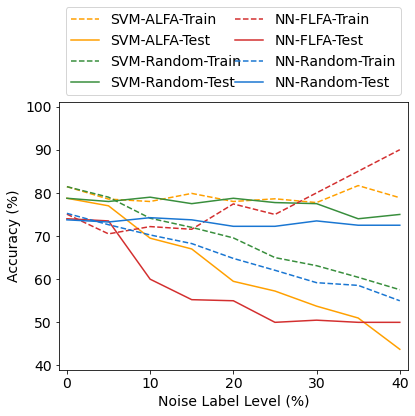

In [18]:
fontsize = 14
dataname = 'Abalone'



plt.rcParams["font.size"] = fontsize
fig, ax = plt.subplots(figsize=(6, 6))
df_svm_alfa.plot(x='rate', y='train', ax=ax, style='--', color=colors['svm-alfa'])
df_svm_alfa.plot(x='rate', y='test', ax=ax, color=colors['svm-alfa'])

df_svm_random.plot(x='rate', y='train', ax=ax, style='--', color=colors['svm-random'])
df_svm_random.plot(x='rate', y='test', ax=ax, color=colors['svm-random'])

df_nn_flfa.plot(x='rate', y='train', ax=ax, style='--', color=colors['nn-flfa'])
df_nn_flfa.plot(x='rate', y='test', ax=ax, color=colors['nn-flfa'])

df_nn_random.plot(x='rate', y='train', ax=ax, style='--', color=colors['nn-random'])
df_nn_random.plot(x='rate', y='test', ax=ax, color=colors['nn-random'])

ax.set(xlim=[-1, 41], ylim=[39, 101])
ax.legend([
    'SVM-ALFA-Train',
    'SVM-ALFA-Test',
    'SVM-Random-Train',
    'SVM-Random-Test',
    'NN-FLFA-Train',
    'NN-FLFA-Test',
    'NN-Random-Train',
    'NN-Random-Test',
], bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2)
ax.set_xlabel('Noise Label Level (%)')
ax.set_ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()

In [19]:
def draw_subplot(path_scores, dataname, ax):
    df_nn_flfa = pd.read_csv(path_scores[0])
    df_nn_random = pd.read_csv(path_scores[1])
    df_svm_alfa = pd.read_csv(path_scores[2])
    df_svm_random = pd.read_csv(path_scores[3])

    df_nn_flfa = df_nn_flfa * 100
    df_nn_random = df_nn_random * 100
    df_svm_alfa = df_svm_alfa * 100
    df_svm_random = df_svm_random * 100

    # df_svm_alfa.plot(x='rate', y='train', ax=ax, style='--', marker='.', color=colors['svm-alfa'])
    # df_svm_alfa.plot(x='rate', y='test', ax=ax, marker='.', color=colors['svm-alfa'])

    # df_svm_random.plot(x='rate', y='train', ax=ax, style='--', marker='.', color=colors['svm-random'])
    # df_svm_random.plot(x='rate', y='test', ax=ax, marker='.', color=colors['svm-random'])

    df_nn_flfa.plot(x='rate', y='train', ax=ax, style='--', marker='.', color=colors['nn-flfa'])
    df_nn_flfa.plot(x='rate', y='test', ax=ax, marker='.', color=colors['nn-flfa'])

    df_nn_random.plot(x='rate', y='train', ax=ax, style='--', marker='.', color=colors['nn-random'])
    df_nn_random.plot(x='rate', y='test', ax=ax, marker='.', color=colors['nn-random'])

    ax.set(xlim=[-1, 41], ylim=[29, 105])
    ax.set_title(dataname)
    ax.set_xlabel('Noise Label Level (%)')
    ax.set_ylabel('Accuracy (%)')

    ax.get_legend().remove()

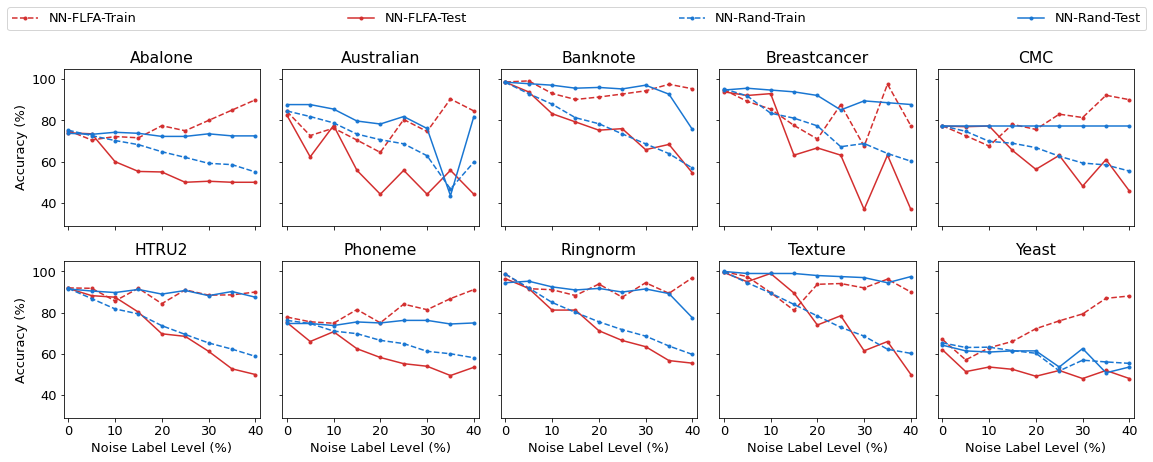

In [20]:
titlenames = [
    'Abalone',
    'Australian',
    'Banknote',
    'Breastcancer',
    'CMC',
    'HTRU2',
    'Phoneme',
    'Ringnorm',
    'Texture',
    'Yeast'
]

fontsize = 13
plt.rcParams["font.size"] = fontsize
fig, axs = plt.subplots(2, 5, sharey=True, sharex=True, figsize=(16, 6))
_axs = []
for i in range(2):
    for j in range(5):
        _axs.append(axs[i, j])
for dataname, title, ax in zip(datanames, titlenames, _axs):
    draw_subplot([ps for ps in path_scores if dataname in ps], title, ax)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
labels = [
    # 'SVM-ALFA-Train',
    # 'SVM-ALFA-Test',
    # 'SVM-Random-Train',
    # 'SVM-Random-Test',
    'NN-FLFA-Train',
    'NN-FLFA-Test',
    'NN-Rand-Train',
    'NN-Rand-Test',
]
fig.legend(lines, labels, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=4)

plt.tight_layout()
plt.show()